# Analytic continuation of discrete distributions

This notebook aims to evaluate the accuracy of relaxed inference in `CompartmentalModel`s.

In [1]:
import torch
import pyro
import pyro.distributions as dist
from pyro.contrib.epidemiology.distributions import set_approx_log_prob_tol
import matplotlib.pyplot as plt

pyro.enable_validation(False)

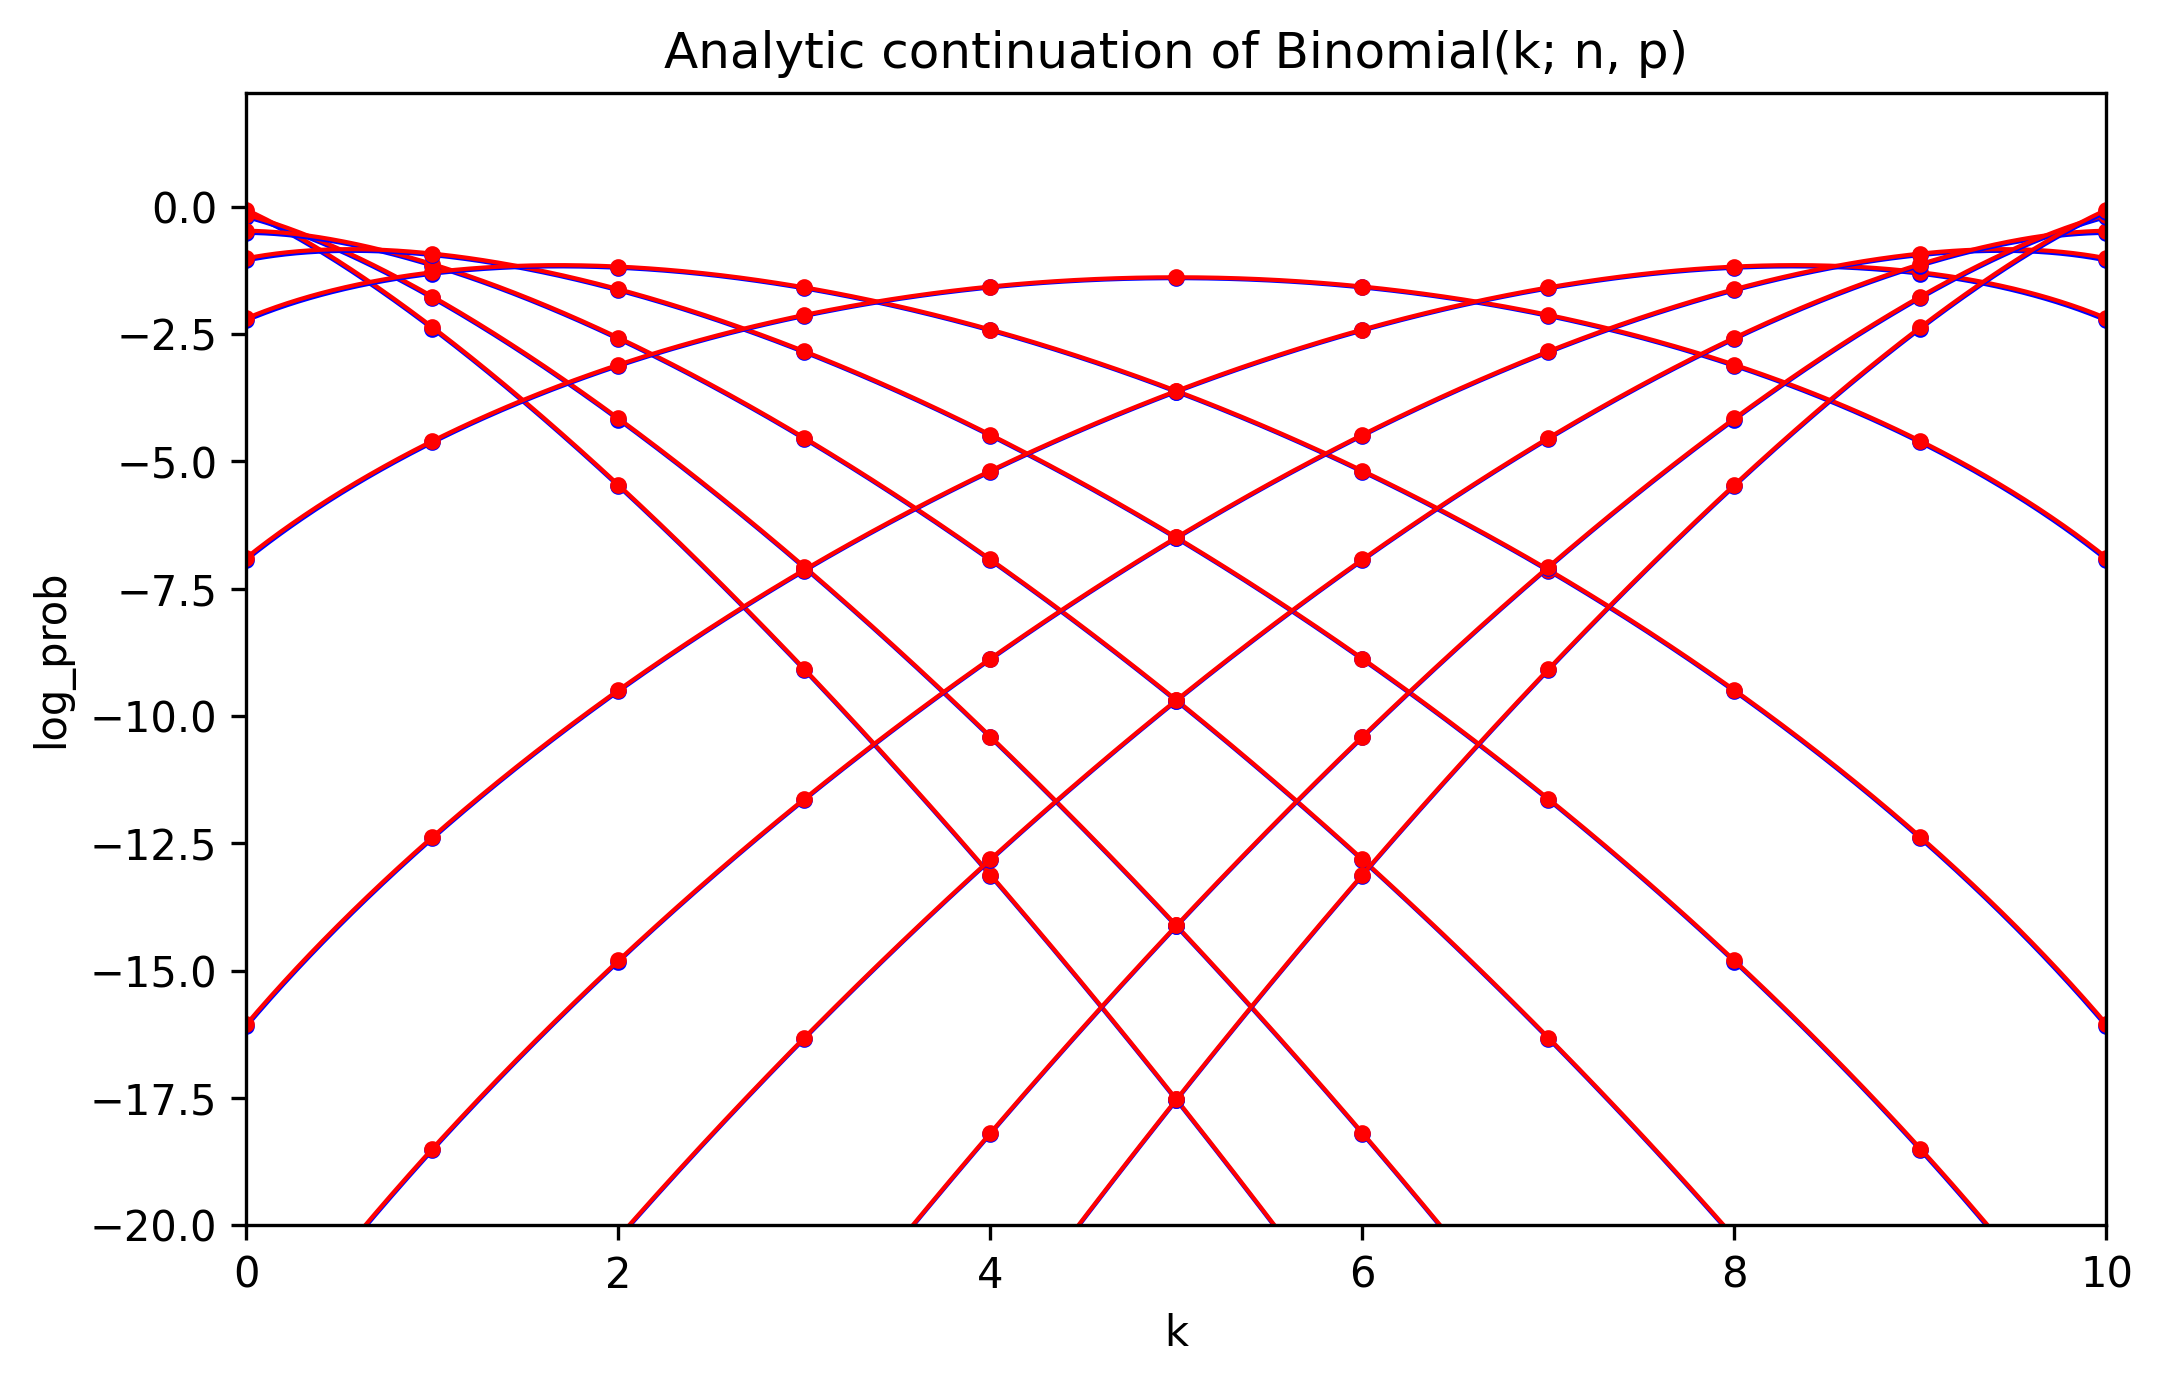

In [2]:
n = 10
k = torch.linspace(0., 10., 1000)
i = torch.arange(n + 1.0)
plt.figure(figsize=(8, 5), dpi=300).patch.set_color("white")
for probs in [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 0.98, 0.99]:
    plt.plot(k, dist.ExtendedBinomial(n, probs).log_prob(k), "b-", lw=1)
    plt.plot(i, dist.ExtendedBinomial(n, probs).log_prob(i), "b.")
    with set_approx_log_prob_tol(0.1):
        plt.plot(k, dist.ExtendedBinomial(n, probs).log_prob(k), "r-", lw=1)
        plt.plot(i, dist.ExtendedBinomial(n, probs).log_prob(i), "r.")
plt.xlim(0, n)
plt.ylim(-20, None)
plt.xlabel("k")
plt.ylabel("log_prob")
plt.title("Analytic continuation of Binomial(k; n, p)");

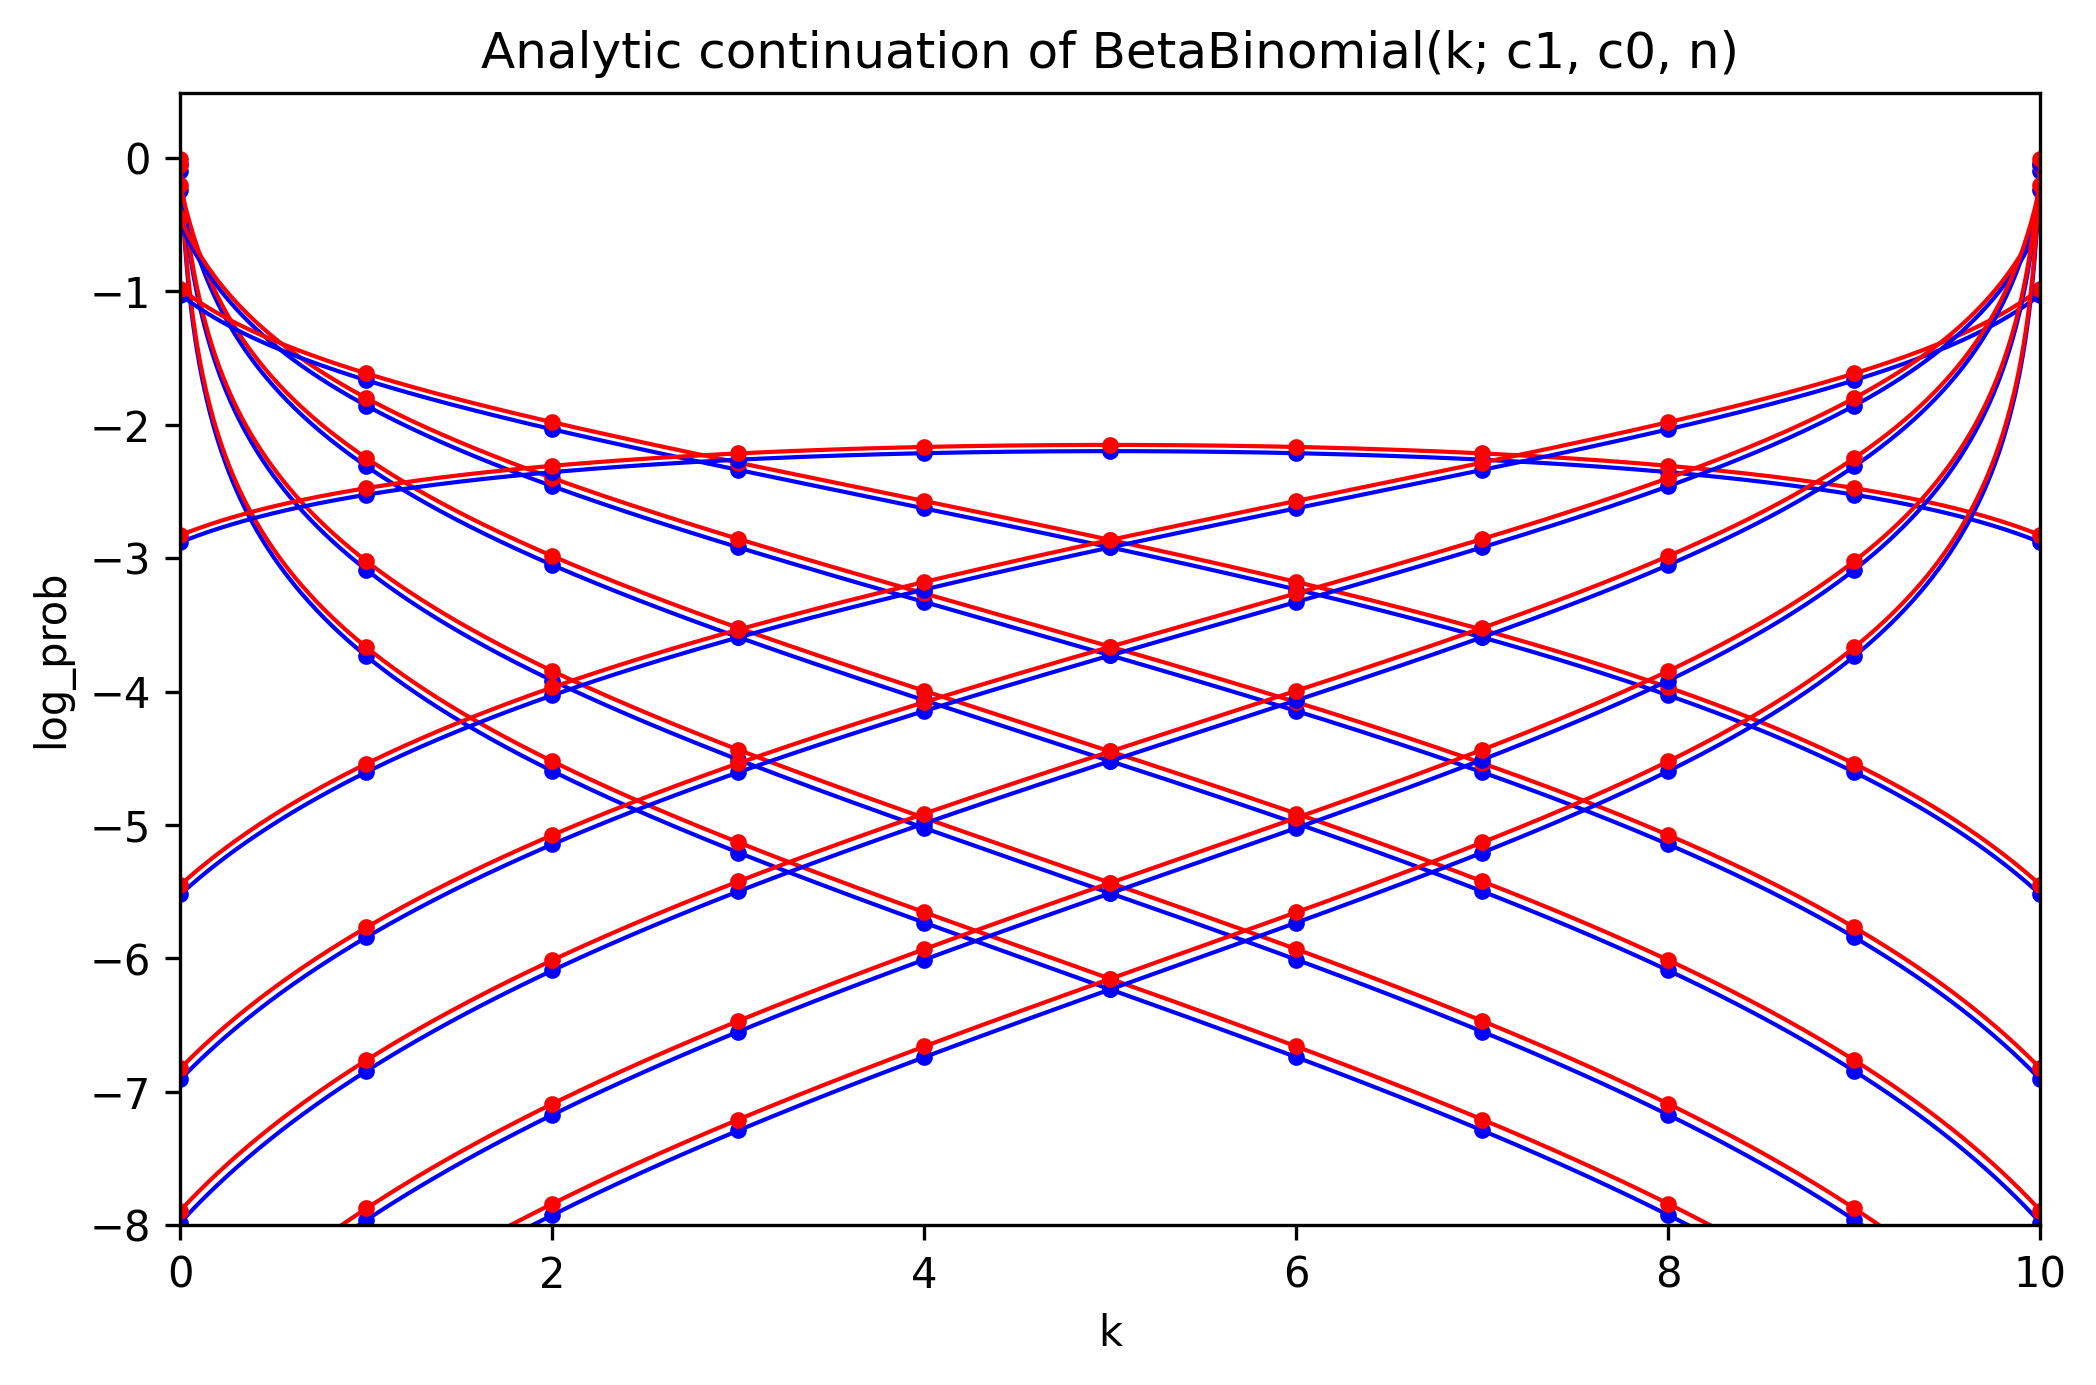

In [3]:
n = 10
k = torch.linspace(0., 10., 1000)
i = torch.arange(n + 1.0)
concentration = 3.
plt.figure(figsize=(8, 5), dpi=300).patch.set_color("white")
for probs in [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 0.98, 0.99]:
    c1 = concentration * probs
    c0 = concentration * (1 - probs)
    plt.plot(k, dist.ExtendedBetaBinomial(c1, c0, n).log_prob(k), "b-", lw=1)
    plt.plot(i, dist.ExtendedBetaBinomial(c1, c0, n).log_prob(i), "b.")
    with set_approx_log_prob_tol(0.1):
        plt.plot(k, dist.ExtendedBetaBinomial(c1, c0, n).log_prob(k), "r-", lw=1)
        plt.plot(i, dist.ExtendedBetaBinomial(c1, c0, n).log_prob(i), "r.")
plt.xlim(0, n)
plt.ylim(-8, None)
plt.xlabel("k")
plt.ylabel("log_prob")
plt.title("Analytic continuation of BetaBinomial(k; c1, c0, n)");